In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [53]:
df=pd.read_csv('election2024.csv')
df

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


In [54]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [55]:
df.shape

(1600, 16)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [57]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [58]:
df['company_type'].mode()

0    industry, manufacturing
Name: company_type, dtype: object

In [59]:
mode_value=df[df['company_type'].notna()]['company_type'].mode()[0]


In [60]:
mode_value

'industry, manufacturing'

In [61]:
df['Company_type']=df['company_type'].fillna(mode_value)

In [62]:
df['Company_type'].isna().sum()

0

In [63]:
df.drop('company_type',inplace=True,axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  weight1              1600 non-null   float64
 15  Company_type         1600 non-null   o

In [65]:
#Data Cleaning
df.drop('id',axis=1,inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   object 
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  job_type             692 non-null    object 
 13  weight1              1600 non-null   float64
 14  Company_type         1600 non-null   object 
dtypes: float64(2), object(13)
memory usage

In [67]:
#finf mode of job_type feature
mode_value=df[df['job_type'].notna()]['job_type'].mode()[0]


In [68]:
#Fill null value from mode value
df['Job_type']=df['job_type'].fillna(mode_value)



In [69]:
df['Job_type'].isna().sum()

0

In [70]:

df.drop('job_type',inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   object 
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  weight1              1600 non-null   float64
 13  Company_type         1600 non-null   object 
 14  Job_type             1600 non-null   object 
dtypes: float64(2), object(13)
memory usage

In [71]:
cat_col=[col for col in df.columns if df[col].dtype=="object"]
cat_col

['sex',
 'federal_district',
 'type_of_city',
 'knows_election_date',
 'will_vote',
 'candidate',
 'television_usage',
 'internet_usage',
 'education',
 'income',
 'employment',
 'Company_type',
 'Job_type']

In [72]:
num_col=[col for col in df.columns if df[col].dtype!="object"]
num_col

['age', 'weight1']

In [73]:
for col in cat_col:
    print(f"{col} has {df[col].unique()} values\n")
    

sex has ['male' 'female'] values

federal_district has ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern'] values

type_of_city has ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k'] values

knows_election_date has ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year'] values

will_vote has ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'struggle to answer'] values

candidate has ['Putin' 'Davankov' 'will not take part' 'spoilt vote' 'Kharitonov'
 'struggle to answer' 'Slutskiy'] values

television_usage has ['several times a week' 'once half a year' 'does not watch'
 'less than 4 hours a day' 'over 4 hours a day' 'several times a month'] values

internet_usage has ['over 4 hours a day' 'less than 4 hours a day' 'several tim

In [74]:
df.duplicated().sum()

0

In [75]:
df['age'].value_counts(ascending=False)
#Insights most voters has age is 40 and 37yrs

age
40.0    46
37.0    46
45.0    45
38.0    44
39.0    39
        ..
86.0     4
85.0     4
87.0     3
81.0     3
90.0     1
Name: count, Length: 71, dtype: int64

In [76]:
df['employment'].value_counts()
#Insights in this voting greater employement is work for hire

employment
work for hire           535
unemployed pensioner    502
self-employed           122
employed pensioner      120
unemployed              101
entrepreneur             87
parental leave           44
employed student         37
unemployed student       27
hard to say              22
refused to answer         3
Name: count, dtype: int64

In [77]:
df['Job_type'].value_counts()

Job_type
commercial organization                    1353
government agency                           163
law enforcement agency                       33
non-profit agency                            22
hard to say                                  22
government, management, judicial bodies       7
Name: count, dtype: int64

In [78]:
#Insights most viters have job type is commercial Organization

<Axes: xlabel='sex', ylabel='count'>

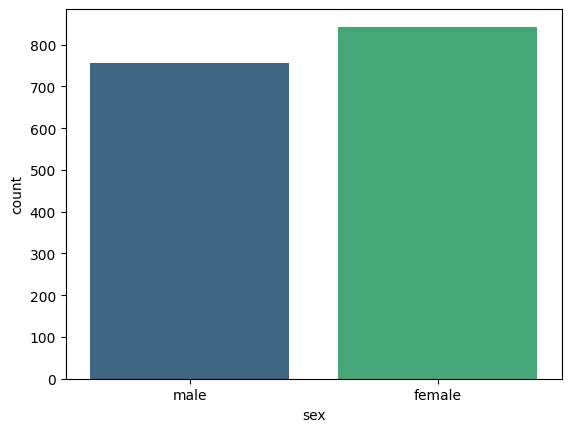

In [79]:
#Univariate analysis

sns.countplot(x="sex", data=df,palette='viridis',)

In [80]:
#Insights female voting has geater than male


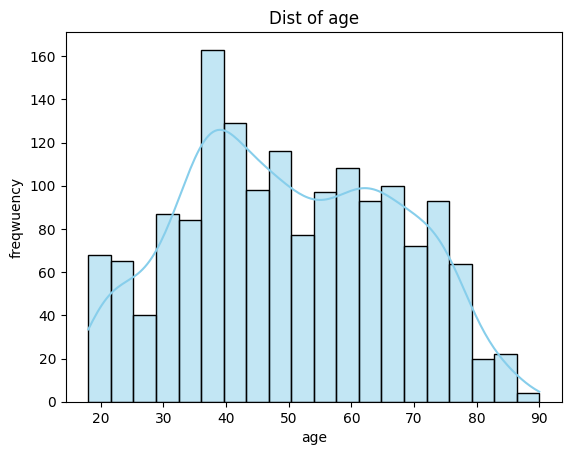

In [81]:
sns.histplot(df['age'],kde=True,bins=20,color='skyblue')
plt.title("Dist of age")
plt.xlabel("age")
plt.ylabel("freqwuency")
plt.show()

In [82]:
# Insights distribution of age has not skewness


<Axes: xlabel='education', ylabel='count'>

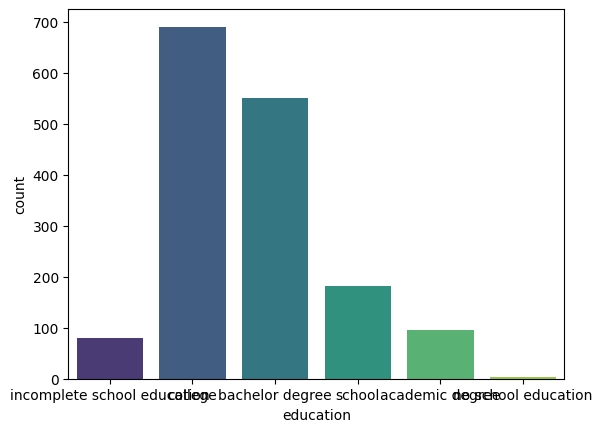

In [83]:
sns.countplot(x="education", data=df,palette='viridis',)

In [84]:
#Insights Most of voters education type is college

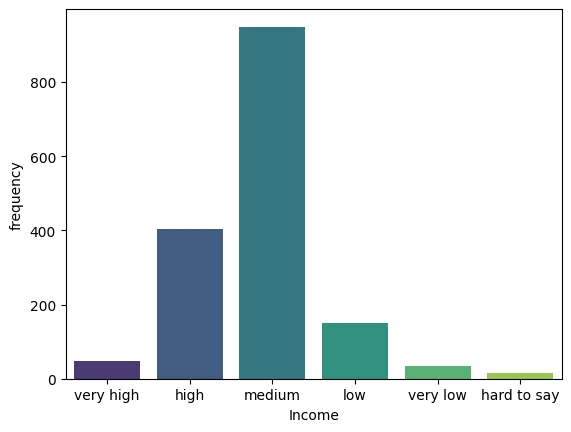

In [85]:
sns.countplot(x="income", data=df,palette='viridis')
plt.xlabel("Income")
plt.ylabel("frequency")
plt.show()

In [86]:
# Most of voters have medium income 


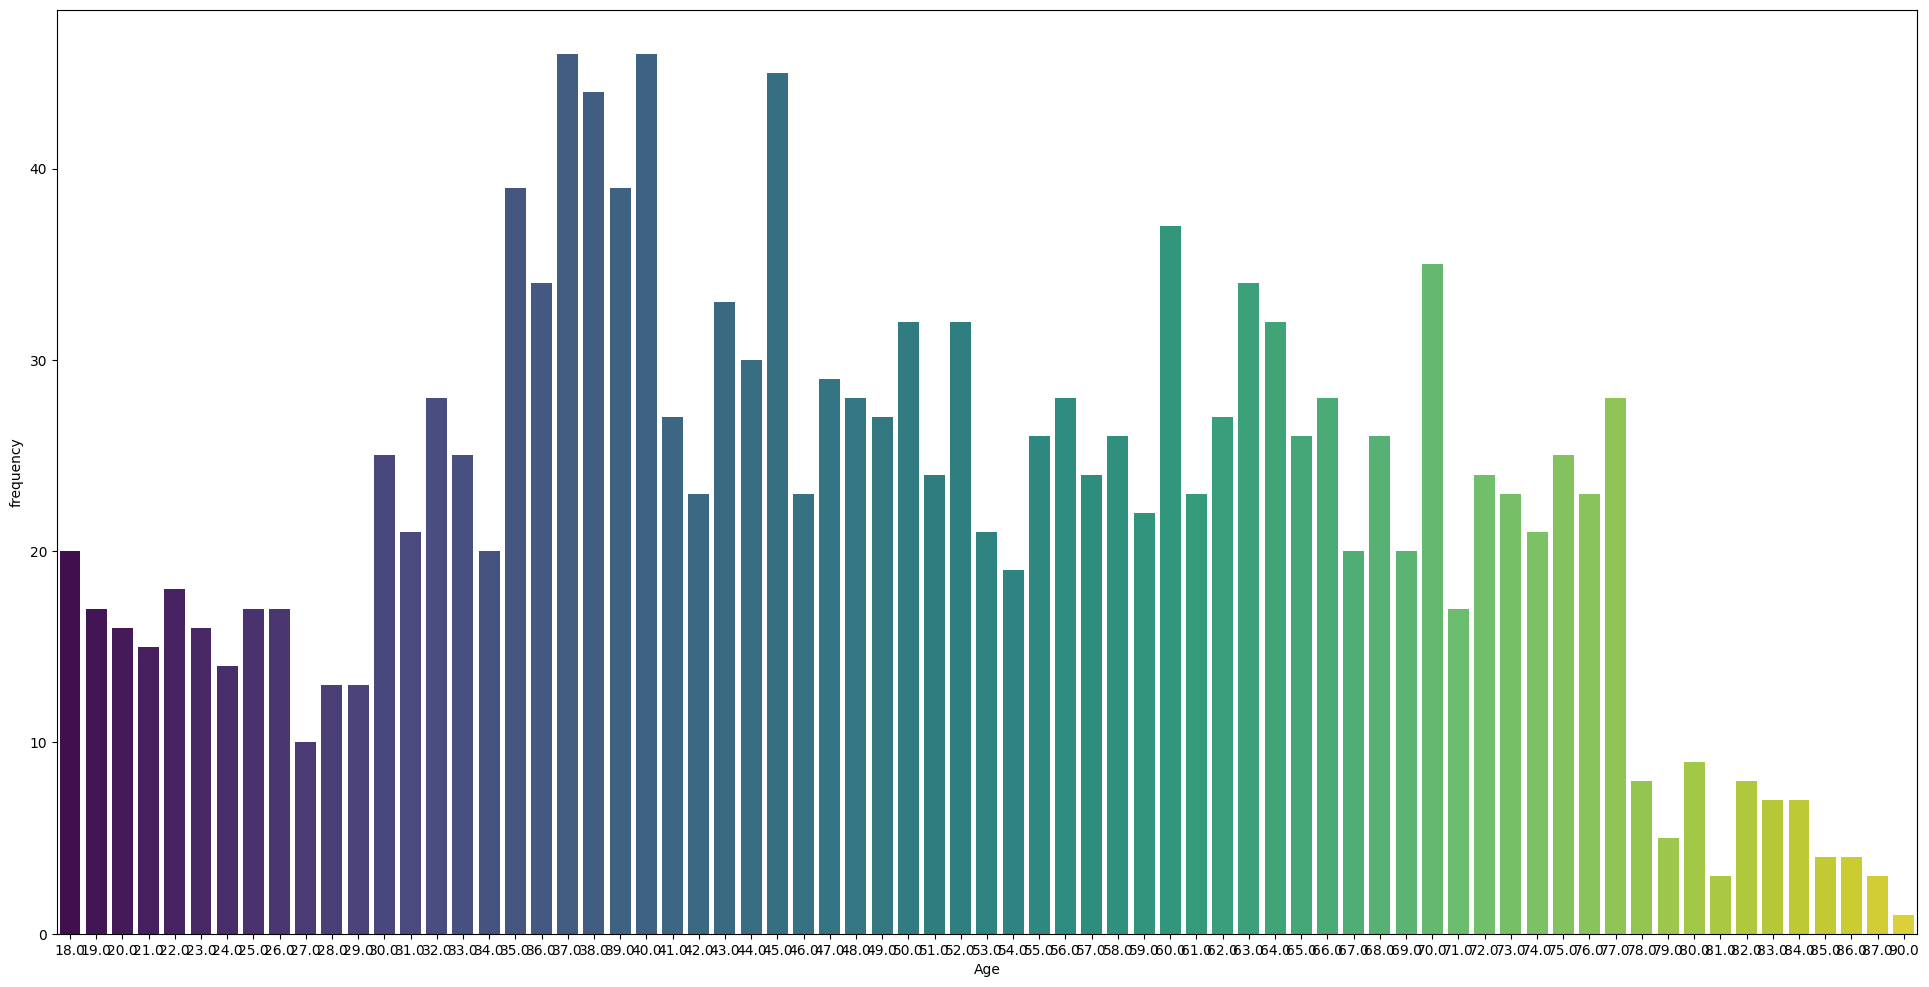

In [87]:
plt.figure(figsize=(24,12))
sns.countplot(x="age", data=df,palette='viridis')
plt.xlabel("Age")
plt.ylabel("frequency")
plt.show()

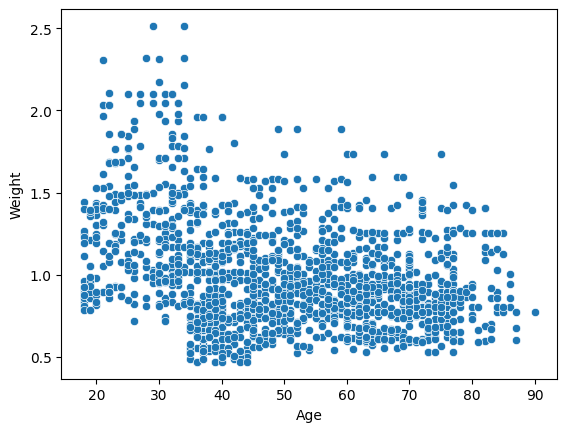

In [88]:
#Bivariate Analysis
sns.scatterplot(x='age',y='weight1',data=df)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.show()

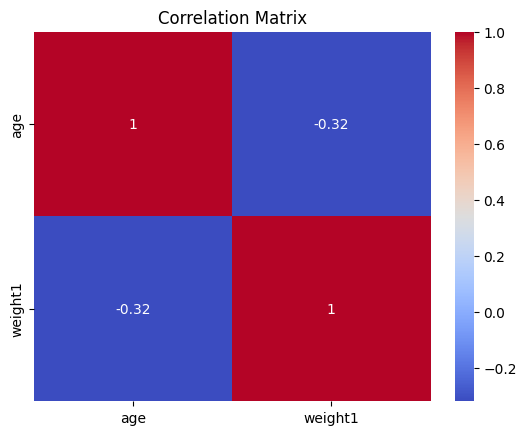

In [89]:
# Correlation heatmap
data=df[['age','weight1']]
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

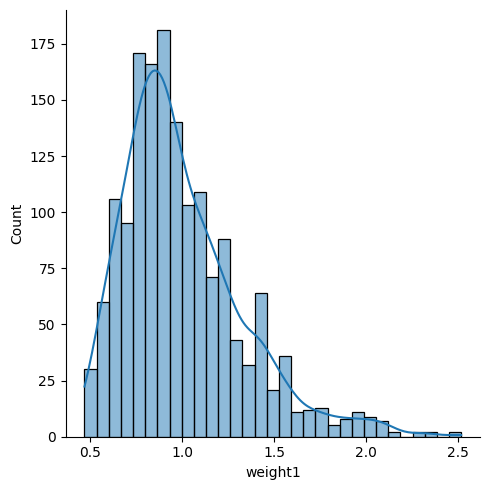

In [90]:
sns.displot(df['weight1'],kde=True)

In [91]:
#Insights this is left skewness.

<Axes: ylabel='count'>

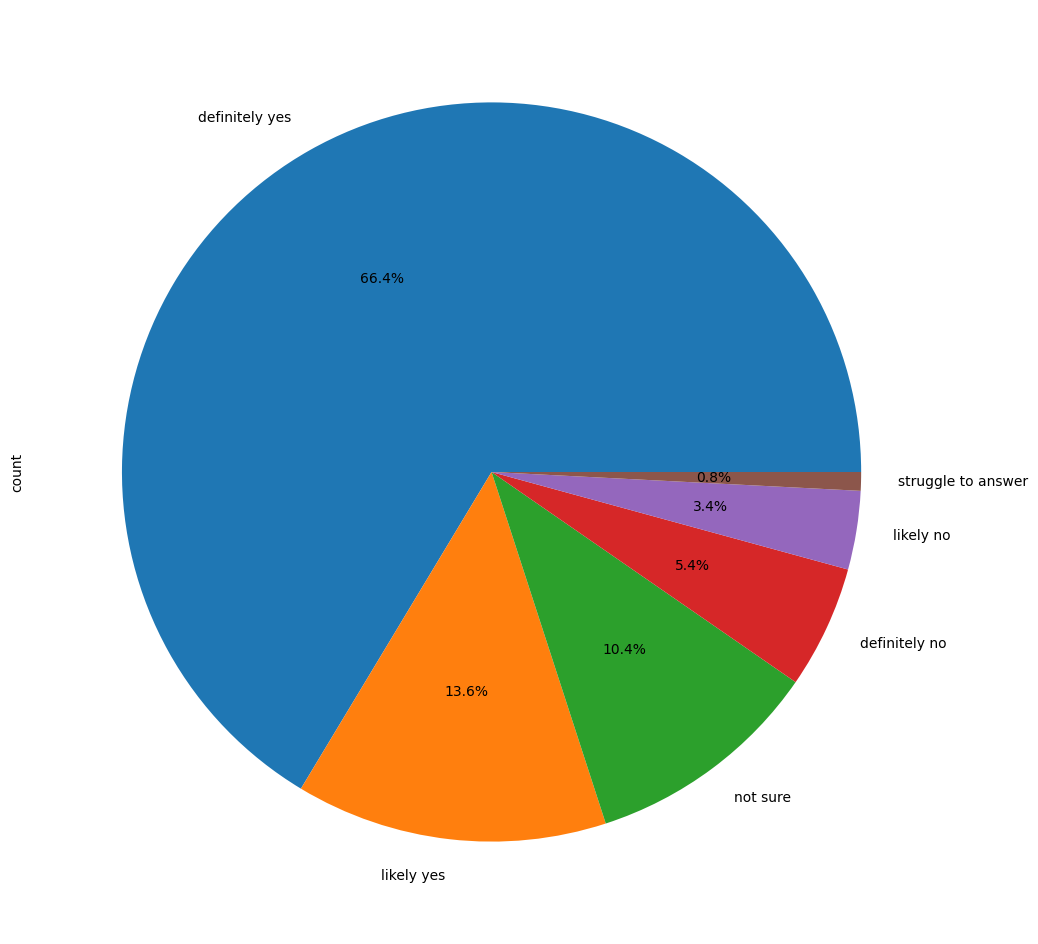

In [92]:
df['will_vote'].value_counts().plot.pie(y=df['will_vote'],figsize=(12,12),autopct='%1.1f%%')

In [93]:
#Insights voters will decide voting definnitely yes

<Axes: ylabel='age'>

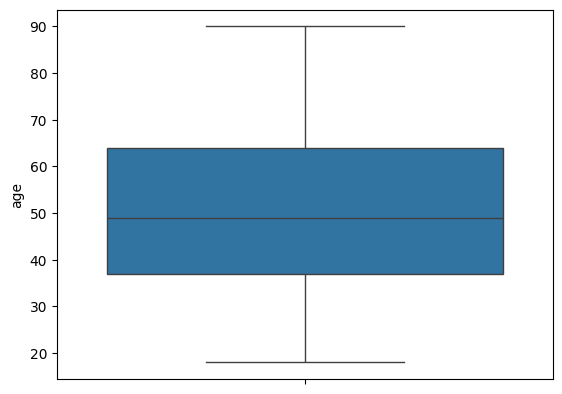

In [94]:
#Outliers Identify
sns.boxplot(df['age'])


In [95]:
#Insights there are not outliers present
